In [5]:
#https://github.com/Ouranosinc/raven/issues/396
#https://github.com/CSHS-CWRA/RavenPy/blob/master/docs/notebooks/08_Getting_and_bias_correcting_CMIP6_data.ipynb
#needs intake-xarray, intake-esm and s3fs   https://s3.us-east-1.wasabisys.com/era5/world/reanalysis/single-levels/zarr/timeseries_real_time

#https://github.com/xarray-contrib/xbatcher
#https://discourse.pangeo.io/t/efficiently-slicing-random-windows-for-reduced-xarray-dataset/2447/27
#https://discourse.pangeo.io/t/any-suggestions-for-efficiently-operating-over-windows-of-data/3133/4
#https://github.com/ocean-transport/surface_currents_ml/blob/master/train_models_stencil_in_space.ipynb

import intake
import xarray
import zarr
catalog_name = "https://raw.githubusercontent.com/hydrocloudservices/catalogs/main/catalogs/atmosphere.yaml"
cat = intake.open_catalog(catalog_name)

#ds = cat.era5_reanalysis_single_levels.to_dask()
ds = cat.era5_land_reanalysis.to_dask()



In [6]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 701, longitude: 1171, time: 653712)
Coordinates:
  * latitude   (latitude) float64 85.0 84.9 84.8 84.7 ... 15.3 15.2 15.1 15.0
  * longitude  (longitude) float64 -167.0 -166.9 -166.8 ... -50.2 -50.1 -50.0
  * time       (time) datetime64[ns] 1950-01-01 ... 2024-07-28T23:00:00
Data variables:
    sd         (time, latitude, longitude) float32 dask.array<chunksize=(1440, 7, 7), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1440, 7, 7), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(1440, 7, 7), meta=np.ndarray>
Attributes:
    pangeo-forge:inputs_hash:  c26c99b6d53111a1137bdab115dd373c86989887689888...
    pangeo-forge:recipe_hash:  185c78fc7af49b9a19ecaef02b9bc3aca3613f7400fb43...
    pangeo-forge:version:      0.9.4

In [1]:
import xarray as xr
import fsspec

In [3]:
bucket_era5_land ='s3://era5-atlantic-northeast/zarr/land/reanalysis'
client_kwargs={"endpoint_url":"https://s3.us-east-2.wasabisys.com"}


In [4]:
#Mapping vers filesystem depuis le bucket
store = fsspec.get_mapper(url=bucket_era5_land,
                          client_kwargs=client_kwargs,
                          anon=True)



# Ouverture du zarr vers dataset (xarray)
ds_era5 = xr.open_zarr(store,
                       consolidated=True,
                       chunks='auto')
ds_era5

<xarray.Dataset> Size: 5TB
Dimensions:    (time: 342600, latitude: 231, longitude: 441)
Coordinates:
  * latitude   (latitude) float32 924B 63.0 62.9 62.8 62.7 ... 40.2 40.1 40.0
  * longitude  (longitude) float32 2kB -96.0 -95.9 -95.8 ... -52.2 -52.1 -52.0
  * time       (time) datetime64[ns] 3MB 1981-01-01 ... 2020-01-31T23:00:00
Data variables: (12/19)
    d2m        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    e          (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    licd       (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    sd         (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    sde        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    sf         (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    ...         ...
    swvl3      (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    t2m        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    tp         (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    tsn        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    u10        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>
    v10        (time, latitude, longitude) float64 279GB dask.array<chunksize=(8760, 10, 10), meta=np.ndarray>

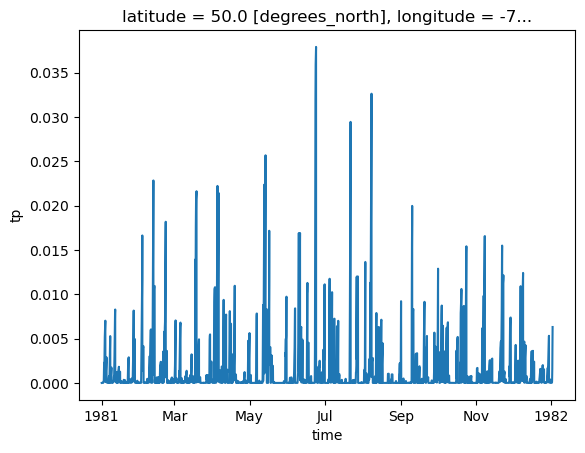

In [6]:
(ds_era5.tp.sel(latitude=50, 
            longitude=-70,
            time=slice('1981-01-01', '1982-01-01'))).plot()

In [2]:
store = 'az://carbonplan-share/example_cmip6_data.zarr'
ds = xr.open_dataset(
    store,
    engine='zarr',
    chunks={},
    backend_kwargs={'storage_options': {'account_name': 'carbonplan'}},
)


In [3]:
ds

<xarray.Dataset> Size: 7MB
Dimensions:  (lat: 145, lon: 192, time: 60)
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 480B 1850-01-01T12:00:00 ... 1850-03-01T12...
Data variables:
    tasmax   (time, lat, lon) float32 7MB dask.array<chunksize=(60, 145, 192), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    cmor_version:           3.4.0
    ...                     ...
    title:                  ACCESS-ESM1-5 output prepared for CMIP6
    tracking_id:            hdl:21.14100/67543e90-bb83-44b1-8a30-e1fbb5ada0dd...
    variable_id:            tasmax
    variant_label:          r1i1p1f1
    version:                v20191115
    version_id:             v20191115

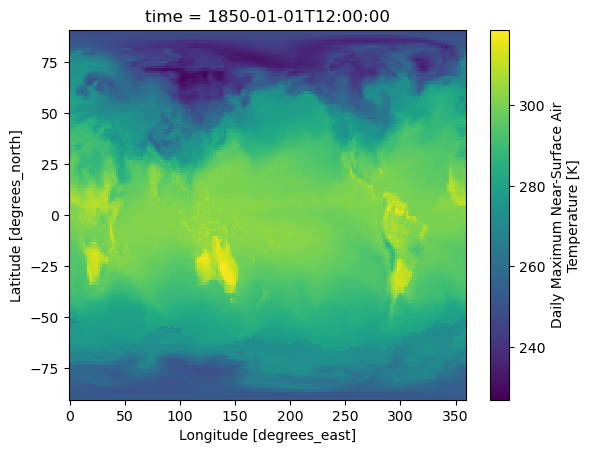

In [4]:
ds.isel(time=0).tasmax.plot();